In [63]:
import pandas as pd
import urllib
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# DATA

In [2]:
#import firearm data from github
url = 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv'
firearm = pd.read_csv(url)
firearm.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [3]:
#retrieve the guns owned vs. mass shooting csv
urllib.request.urlretrieve("data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78",filename="guns_owned_mass.csv")

('guns_owned_mass.csv', <email.message.Message at 0x7f3a89110fd0>)

In [4]:
!mv guns_owned_mass.csv $PUIDATA

In [5]:
#import guns owned
guns_owned = pd.read_csv(os.getenv("PUIDATA")+"/"+'guns_owned_mass.csv')
guns_owned.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [6]:
url2 = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel'
pop = pd.read_excel(url2,skiprows=3)
pop = pop[['Country Name','2012']]
pop.head()

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [7]:
url3 = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel'
gdp = pd.read_excel(url3,skiprows=3)
gdp = gdp[['Country Name','2012']]
gdp.head()

,Country Name,2012
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [8]:
firearm_gun = pd.merge(left=firearm,right=guns_owned,left_on='Country/Territory',right_on='Country')
firearm_gun = firearm_gun[['Country','Average total all civilian firearms','Number of mass shootings (1983-2013)','Guns per 100 inhabitants','Average firearms per 100 people','Number of homicides by firearm']]
firearm_gun.head()

,Country,Average total all civilian firearms,Number of mass shootings (1983-2013),Guns per 100 inhabitants,Average firearms per 100 people,Number of homicides by firearm
0,Australia,3050000.0,4,15.0,15.0,30.0
1,Austria,2500000.0,1,30.4,30.4,18.0
2,Belgium,1800000.0,2,17.2,17.2,70.0
3,Canada,9950000.0,4,30.8,30.8,173.0
4,Denmark,650000.0,0,12.0,12.0,15.0


In [9]:
world_bank = pd.merge(left=pop,right=gdp,left_on='Country Name',right_on='Country Name')
world_bank.head()

,Country Name,2012_x,2012_y
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.139232e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.164615e+09


In [10]:
shots = pd.merge(left=world_bank,right=firearm_gun,left_on='Country Name',right_on='Country')
shots.rename(columns={'2012_x':'pop','2012_y':'gdp'}, inplace=True)
shots = shots[['Country','pop','gdp','Average total all civilian firearms','Number of mass shootings (1983-2013)','Guns per 100 inhabitants','Average firearms per 100 people','Number of homicides by firearm']]

In [11]:
shots.head()

,Country,pop,gdp,Average total all civilian firearms,Number of mass shootings (1983-2013),Guns per 100 inhabitants,Average firearms per 100 people,Number of homicides by firearm
0,Australia,22742475.0,1.543411e+12,3050000.0,4,15.0,15.0,30.0
1,Austria,8429991.0,4.094252e+11,2500000.0,1,30.4,30.4,18.0
2,Belgium,11128246.0,4.978842e+11,1800000.0,2,17.2,17.2,70.0
3,Canada,34750545.0,1.824289e+12,9950000.0,4,30.8,30.8,173.0
4,Switzerland,7996861.0,6.680436e+11,3400000.0,2,45.7,45.7,57.0


### plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Text(0.5,1,'Fig 1: GDP ($US) vs. Number of Mass Shootings (1983-2012) per ')

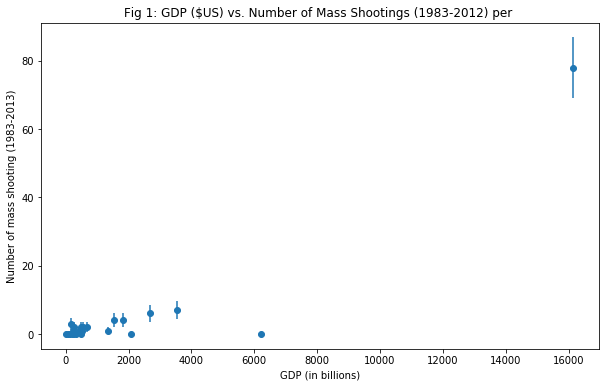

In [12]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.scatter(shots['gdp'] / 1e9,shots['Number of mass shootings (1983-2013)'])

ax1.errorbar(shots['gdp'] / 1e9,shots['Number of mass shootings (1983-2013)'], 
             yerr = np.sqrt(shots['Number of mass shootings (1983-2013)'] * 1.0),fmt='.')

ax1.set_xlabel("GDP (in billions)")
ax1.set_ylabel("Number of mass shooting (1983-2013)")
ax1.set_ylim()

ax1.set_title("Fig 1: GDP ($US) vs. Number of Mass Shootings (1983-2012) per ")




### Figure 1 plots GDP in USD vs. mass shootings over the 1983-2012 period. The outlier is the US, with very high GDP and a large number of mass shootings")

Text(0.5,1,'Fig 2: GDP per Capita ($US) vs. Number of Mass Shootings (1983-2012)')

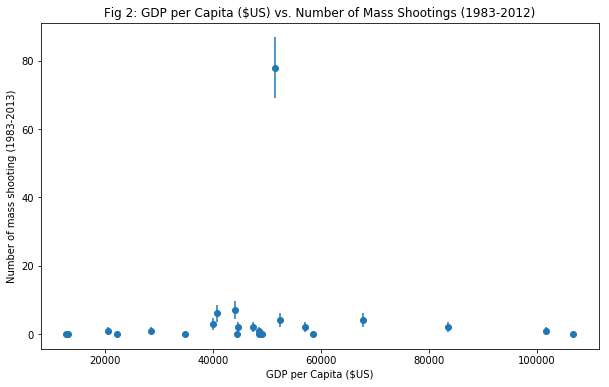

In [13]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.scatter(shots['gdp'] / shots['pop'],shots['Number of mass shootings (1983-2013)'] )

ax1.errorbar(shots['gdp'] / shots['pop'],shots['Number of mass shootings (1983-2013)'], 
             yerr = np.sqrt(shots['Number of mass shootings (1983-2013)'] * 1.0),fmt='.')

ax1.set_xlabel("GDP per Capita ($US)")
ax1.set_ylabel("Number of mass shooting (1983-2013)")
ax1.set_ylim()

ax1.set_title("Fig 2: GDP per Capita ($US) vs. Number of Mass Shootings (1983-2012)")


#### Figure 2 shows the relationship between the number of mass shootings and gdp per capita. Once again we see the US is a significant outlier in terms of the number of mass shootings but is now no longer as significant an outlier since GDP has been adjusted for population

## plot the average number of civilian fire arms per person

In [14]:
shots['shootingspp'] = (shots['Number of mass shootings (1983-2013)'] / shots['pop']) * 1e3

Text(0.5,1,'Fig 3: Avg. Firearms per person vs. Mass Shootings per 1000 people (no error bars)')

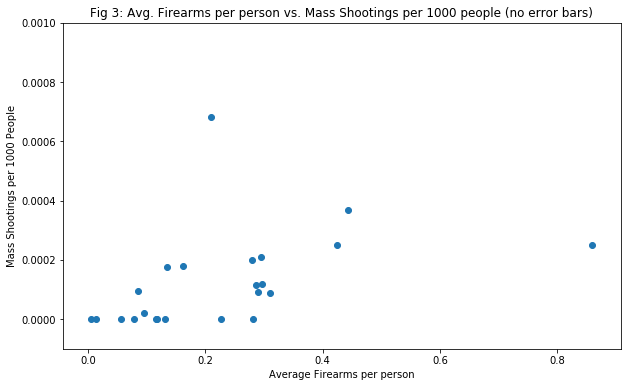

In [15]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.scatter(shots['Average total all civilian firearms'] / shots['pop'],shots['shootingspp'])

#ax1.errorbar(shots['gdp'] / shots['pop'],shots['Number of mass shootings (1983-2013)'], 
#             yerr = np.sqrt(shots['Number of mass shootings (1983-2013)'] * 1.0),fmt='.')

ax1.set_xlabel("Average Firearms per person")
ax1.set_ylabel("Mass Shootings per 1000 People")
ax1.set_ylim(-0.0001,0.001)

ax1.set_title("Fig 3: Avg. Firearms per person vs. Mass Shootings per 1000 people (no error bars)")


#### Figure 3 shows average firearms per person vs. mass shootings per 1000 people. Once population is adjusted for, the US is still an outlier in terms of how many guns there are per person but once mass shootings are adjusted for population it is not as stark.

Text(0.5,1,'Fig 4: Avg. Firearms per person vs. Mass Shootings per 1000 people (error bars included)')

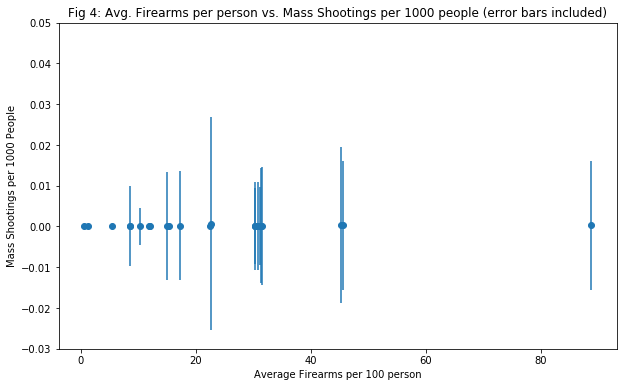

In [16]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.scatter(shots['Guns per 100 inhabitants'],shots['shootingspp'])

ax1.errorbar(shots['Guns per 100 inhabitants'],shots['shootingspp'], 
             yerr = np.sqrt(shots['shootingspp']),fmt='.')

ax1.set_xlabel("Average Firearms per 100 person")
ax1.set_ylabel("Mass Shootings per 1000 People")
ax1.set_ylim(-0.03,0.05)

ax1.set_title("Fig 4: Avg. Firearms per person vs. Mass Shootings per 1000 people (error bars included)")


#### Figure 4 adds error bars to the fig 3 plot. The poisson errors are quite large relative to the value of y, since mass shootings per 1000 people are very small numbers. The scale had to be adjusted to accomodate the error bar, making it challenging to see differences across values.  There appear to be some outliers in terms of firearms per 100 people

## plot the average number of homicide by fire arms per person

Text(0.5,1,'Fig 5: Histogram of Number of Homicides by Firearms per 1000 people')

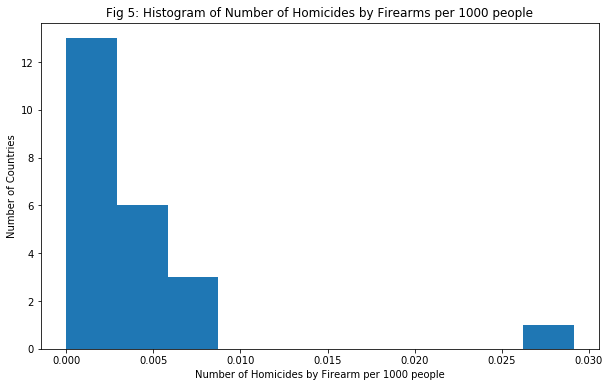

In [17]:

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.hist(shots['Number of homicides by firearm'] / shots['pop'] * 1000, bins=10)

ax1.set_xlabel("Number of Homicides by Firearm per 1000 people")
ax1.set_ylabel("Number of Countries")

ax1.set_title("Fig 5: Histogram of Number of Homicides by Firearms per 1000 people")


#### Figure 5 shows the histogram of number of homicides by firearm per 1000 people. This histogram reveals an obvious outlier and suggest there are a few additional countries that have high rates of gun related deaths.

Text(0.5,1,'Fig 6: Avg. Firearms per person vs. GDP ($billions)')

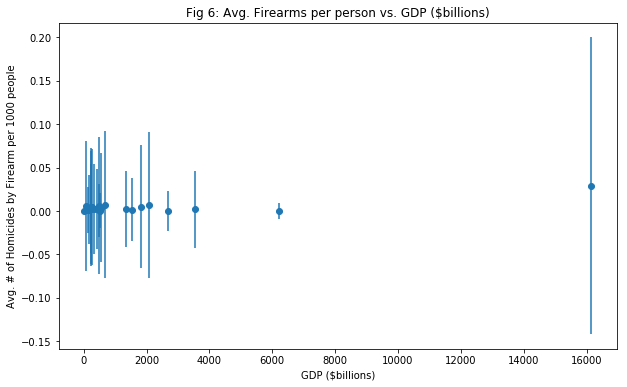

In [18]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.scatter(shots['gdp'] / 1e9,shots['Number of homicides by firearm'] / shots['pop'] * 1000)

ax1.errorbar(shots['gdp'] / 1e9,shots['Number of homicides by firearm'] / shots['pop'] * 1000, 
             yerr = np.sqrt(shots['Number of homicides by firearm'] / shots['pop'] * 1000),fmt='.')

ax1.set_xlabel("GDP ($billions)")
ax1.set_ylabel("Avg. # of Homicides by Firearm per 1000 people")


ax1.set_title("Fig 6: Avg. Firearms per person vs. GDP ($billions)")


###  plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

In [26]:
#create flag for US for coloring
shots['US_flag'] = np.where(shots['Country'] == 'United States', 1, 0)      

In [23]:
shots.head()

,Country,pop,gdp,Average total all civilian firearms,Number of mass shootings (1983-2013),Guns per 100 inhabitants,Average firearms per 100 people,Number of homicides by firearm,shootingspp,US_flag
0,Australia,22742475.0,1.543411e+12,3050000.0,4,15.0,15.0,30.0,0.000176,0
1,Austria,8429991.0,4.094252e+11,2500000.0,1,30.4,30.4,18.0,0.000119,0
2,Belgium,11128246.0,4.978842e+11,1800000.0,2,17.2,17.2,70.0,0.000180,0
3,Canada,34750545.0,1.824289e+12,9950000.0,4,30.8,30.8,173.0,0.000115,0
4,Switzerland,7996861.0,6.680436e+11,3400000.0,2,45.7,45.7,57.0,0.000250,0


Text(0.5,1,'Fig 6: Avg. Firearms per person vs. GDP ($billions)')

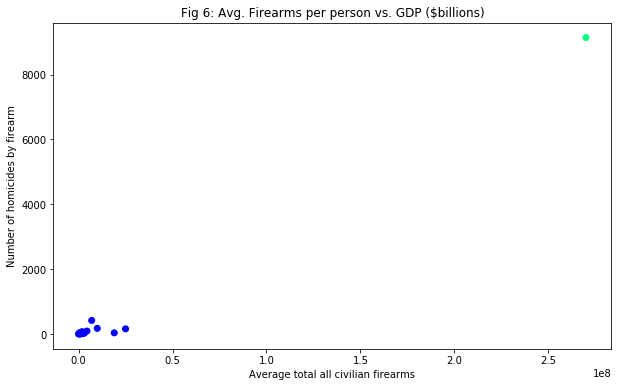

In [29]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.scatter(shots['Average total all civilian firearms'],shots['Number of homicides by firearm'],c=shots['US_flag'],cmap='GnBu')
#ax1.errorbar(shots['gdp'] / 1e9,shots['Number of homicides by firearm'] / shots['pop'] * 1000, 
#             yerr = np.sqrt(shots['Number of homicides by firearm'] / shots['pop'] * 1000),fmt='.')

ax1.set_xlabel("Average total all civilian firearms")
ax1.set_ylabel("Number of homicides by firearm")


ax1.set_title("Fig 7: Number of Homicides by Firearm vs. Number of Civilian Firearms")


### Figure 7 shows the relationship between the number of homicides by firearm and all civilian firearms in a country. As expected, the US is a significant outlier both in terms of the number of firearms and the number of firearm deaths.

Text(0.5,1,'Fig 8: Number of Homicides by Firearm vs. Number of Civilian Firearms (with error bars)')

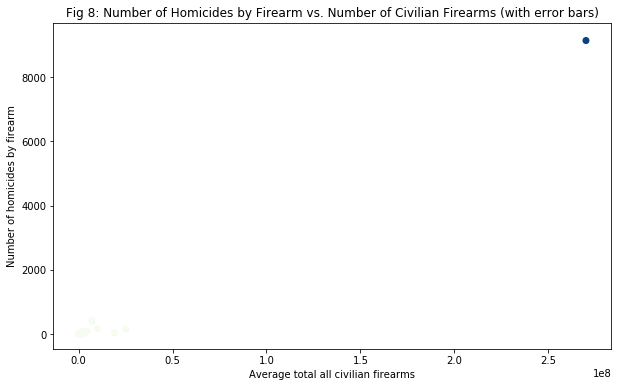

In [45]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.scatter(shots['Average total all civilian firearms'],shots['Number of homicides by firearm'],c=shots['US_flag'],cmap='GnBu')
ax1.errorbar(shots['Average total all civilian firearms'],shots['Number of homicides by firearm'], 
             yerr = np.sqrt(shots['Number of homicides by firearm'] * 1),fmt='.',zorder=0)

ax1.set_xlabel("Average total all civilian firearms")
ax1.set_ylabel("Number of homicides by firearm")


ax1.set_title("Fig 8: Number of Homicides by Firearm vs. Number of Civilian Firearms (with error bars)")


### Figure 8 shows the relationship between the number of homicides by firearm and all civilian firearms in a country. As expected, the US is a significant outlier both in terms of the number of firearms and the number of firearm deaths.

### plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

Text(0.5,1,'Fig 9: Mass Shootings vs. Civilian Firearms (no errorbars)')

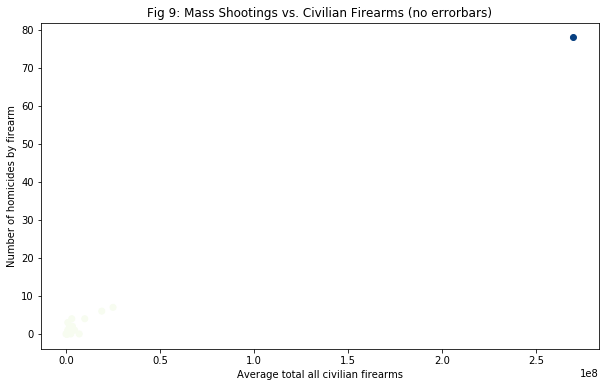

In [46]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.scatter(shots['Average total all civilian firearms'],shots['Number of mass shootings (1983-2013)'],c=shots['US_flag'],cmap='GnBu')
#ax1.errorbar(shots['gdp'] / 1e9,shots['Number of homicides by firearm'] / shots['pop'] * 1000, 
#             yerr = np.sqrt(shots['Number of homicides by firearm'] / shots['pop'] * 1000),fmt='.')

ax1.set_xlabel("Average total all civilian firearms")
ax1.set_ylabel("Number of homicides by firearm")


ax1.set_title("Fig 9: Mass Shootings vs. Civilian Firearms (no errorbars)")


### Figure 9 shows the relationship between mass shootings and civilian firearms. The US is a significant outlier and is colored in dark blue.

Text(0.5,1,'Fig 10: Mass Shootings vs. Civilian Firearms (with errorbars)')

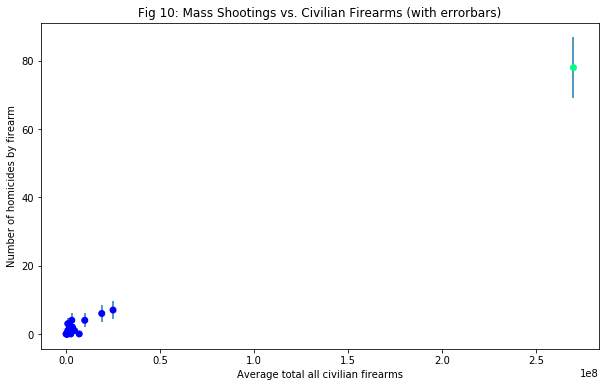

In [48]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)

ax1.scatter(shots['Average total all civilian firearms'],shots['Number of mass shootings (1983-2013)'],c=shots['US_flag'],cmap='winter')
ax1.errorbar(shots['Average total all civilian firearms'],shots['Number of mass shootings (1983-2013)'], 
             yerr = np.sqrt(shots['Number of mass shootings (1983-2013)'] * 1.0),fmt='.',zorder=0)

ax1.set_xlabel("Average total all civilian firearms")
ax1.set_ylabel("Number of homicides by firearm")


ax1.set_title("Fig 10: Mass Shootings vs. Civilian Firearms (with errorbars)")


### fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

In [50]:
shots['firearmspp'] = shots['Average total all civilian firearms'] / shots['pop']

In [51]:
shots.head()

,Country,pop,gdp,Average total all civilian firearms,Number of mass shootings (1983-2013),Guns per 100 inhabitants,Average firearms per 100 people,Number of homicides by firearm,shootingspp,US_flag,firearmspp
0,Australia,22742475.0,1.543411e+12,3050000.0,4,15.0,15.0,30.0,0.000176,0,0.134110
1,Austria,8429991.0,4.094252e+11,2500000.0,1,30.4,30.4,18.0,0.000119,0,0.296560
2,Belgium,11128246.0,4.978842e+11,1800000.0,2,17.2,17.2,70.0,0.000180,0,0.161751
3,Canada,34750545.0,1.824289e+12,9950000.0,4,30.8,30.8,173.0,0.000115,0,0.286326
4,Switzerland,7996861.0,6.680436e+11,3400000.0,2,45.7,45.7,57.0,0.000250,0,0.425167


In [52]:
#normalize the data:

shots['firearmspp_adj'] = (shots['firearmspp'] - shots['firearmspp'].mean()) / shots['firearmspp'].std()
shots['shootingspp_adj'] = (shots['shootingspp'] - shots['shootingspp'].mean()) / shots['shootingspp'].std()

In [53]:
shots.head()

,Country,pop,gdp,Average total all civilian firearms,Number of mass shootings (1983-2013),Guns per 100 inhabitants,Average firearms per 100 people,Number of homicides by firearm,shootingspp,US_flag,firearmspp,firearmspp_adj,shootingspp_adj
0,Australia,22742475.0,1.543411e+12,3050000.0,4,15.0,15.0,30.0,0.000176,0,0.134110,-0.499299,0.324284
1,Austria,8429991.0,4.094252e+11,2500000.0,1,30.4,30.4,18.0,0.000119,0,0.296560,0.383248,-0.030652
2,Belgium,11128246.0,4.978842e+11,1800000.0,2,17.2,17.2,70.0,0.000180,0,0.161751,-0.349137,0.348091
3,Canada,34750545.0,1.824289e+12,9950000.0,4,30.8,30.8,173.0,0.000115,0,0.286326,0.327651,-0.052460
4,Switzerland,7996861.0,6.680436e+11,3400000.0,2,45.7,45.7,57.0,0.000250,0,0.425167,1.081934,0.784338


Text(0.5,1,'Fig 11: Mass Shootings Per Person vs. Firearms Per Person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


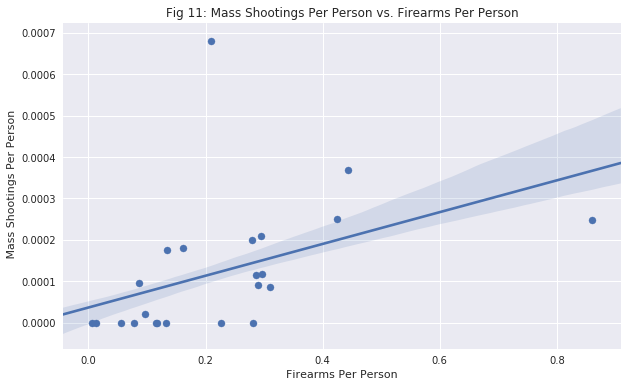

In [68]:
#seaborn plot

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)
sns.regplot(x="firearmspp", y="shootingspp", data=shots,x_estimator=np.mean,ci=50)

ax1.set_xlabel("Firearms Per Person")
ax1.set_ylabel(" Mass Shootings Per Person")


ax1.set_title("Fig 11: Mass Shootings Per Person vs. Firearms Per Person")
